In [25]:
import torch
from torch import nn ## for neural net
import matplotlib as plt ## for plotting

torch.__version__

# create known params
weight = 0.7
bias = 0.3

# create data 

start = 0 
end = 1

step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias


train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

len(X_train), len(y_train), len(X_test), len(y_test)

## X - data
## y is - labels




(40, 40, 10, 10)

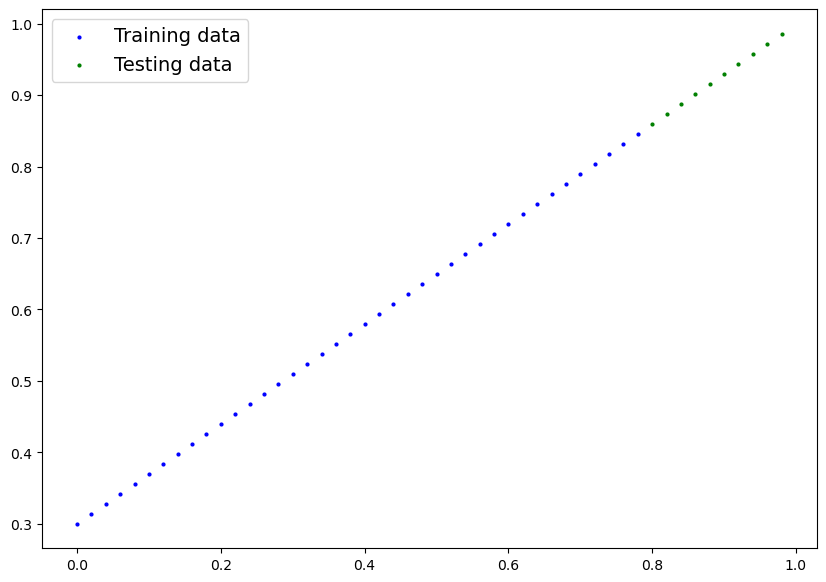

In [29]:
import matplotlib.pyplot as plt

def plotting_predictions(train_data = X_train, 
                         train_labels = y_train,
                         test_data = X_test,
                         test_labels = y_test,
                         predictions = None):
    
    plt.figure(figsize = (10,7))

      # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

plotting_predictions()

